In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h1 style="background-color: #583BE3; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif;">2. Data Inspection</h1>

In [56]:
train_ds = pd.read_csv('/content/train.csv')
test_ds = pd.read_csv('/content/test.csv')

## 2.1. Train

In [57]:
train_ds.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S


## 2.2. Test

In [58]:
test_ds.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
374,1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
256,1148,3,"Mahon, Mr. John",male,NaN,0,0,AQ/4 3130,7.7500,NaN,Q
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C
155,1047,3,"Duquemin, Mr. Joseph",male,24.0,0,0,S.O./P.P. 752,7.5500,NaN,S


In [59]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2.3. Observation - Summary Information
- The train dataset contains a total of **12 columns**, of which there are **7 numerical columns** (`PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`) and **5 categorical columns** (`Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`).

- The shape of the `train_ds` DataFrame is **891 rows** and **12 columns**, indicating that there are 891 entries, each with 12 attributes.

In [60]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Observation - Statistical Summary of Train dataset
- **`Survived`** is a binary indicator where **`1`** represents survival and **`0`** represents non-survival. The mean survival rate is **`0.383838`** (approximately **`38.38%`**), suggesting that less than half of the passengers survived.

- **`Pclass`** represents the class of travel with a lower number indicating a higher class. The passengers are spread across three classes, with a mean **`Pclass`** of **`2.308642`**, implying that most passengers are in the second and third classes.

- The **`Age`** of passengers has a mean of **`29.699118`** years, with the youngest being **`0.42`** years old (likely a few months old) and the oldest at **`80`** years. The age data appears to be incomplete, with **`714`** out of **`891`** entries having non-null values.

# 3. Mising Data Inspection

## 3.1. Missing Values - Train

In [61]:
train_ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3.2. Missing Values - Test

In [62]:
print(test_ds.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 3.3. Observations
### Missing Data Insights for Train Dataset

- **Missing Entries**: In the training dataset of 891 entries, several columns have missing values:
  - `Age` has **177 missing entries (19.87%)**.
  - `Cabin` has **687 missing entries (77.1%)**.
  - `Embarked` has **2 missing entries (0.22%)**.
  
### Missing Data Insights for Test Dataset

- **Missing Entries**: In the training dataset of 418 entries, several columns have missing values:
  - `Age` has **86 missing entries (20.57%)**.
  - `Cabin` has **327 missing entries (78.23%)**.
  - `Fare` has **1 missing entries (0.24%)**.

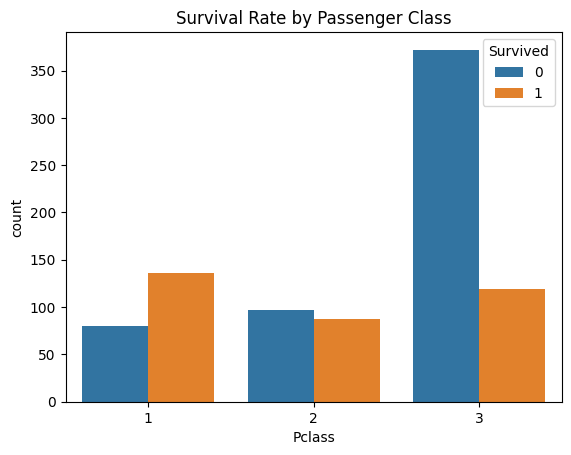

In [63]:
# Visualization of survival based on passenger class
sns.countplot(x='Pclass', hue='Survived', data=train_ds)
plt.title('Survival Rate by Passenger Class')
plt.show()

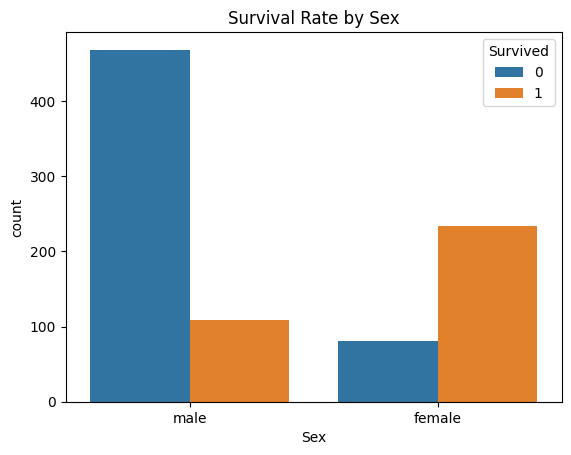

In [64]:
# Visualization of survival based on sex
sns.countplot(x='Sex', hue='Survived', data=train_ds)
plt.title('Survival Rate by Sex')
plt.show()

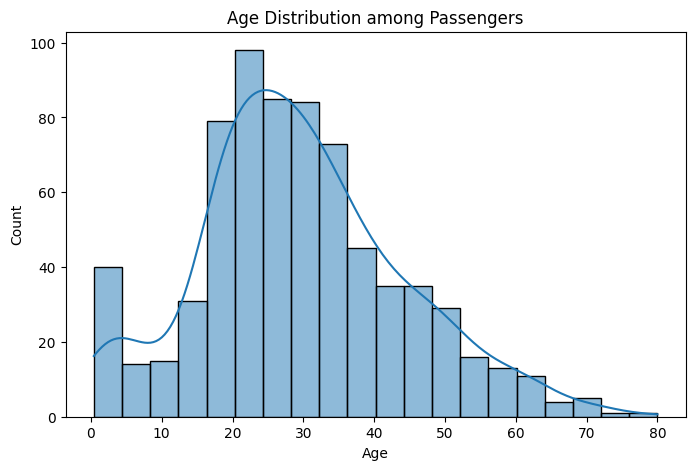

In [65]:
# Distribution of age among passengers
plt.figure(figsize=(8,5))
sns.histplot(train_ds['Age'].dropna(), kde=True)
plt.title('Age Distribution among Passengers')
plt.xlabel('Age')
plt.show()

<h1 style="background-color: #583BE3; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif;">Data Preprocessing</h1>

# 4. Data Cleaning

## 4.1. Handling Missing Values
As we know from our analysis above, the missing values are in the following features:
- Cabin
- Age
- Embarked

Let's deal with these now.
For missing values in Cabin, I will follow the technique used by [Niklas Donges](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8). As the article suggests, in `C123` the `C` refers to a deck on the titanic ship. Using this information, we will create a new feature called `'Deck' `that represents a deck of the cabin.

In [66]:
import re

# Define the deck level dictionary
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Create a list of datasets
data = [train_ds, test_ds]

for dataset in data:
    # Fill missing Cabin values with 'U0'
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")

    # Extract the first sequence of letters which represents the Deck and map it to a number
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)

    # Fill missing Deck values with 0
    dataset['Deck'] = dataset['Deck'].fillna(0)

    # Convert Deck to an integer type
    dataset['Deck'] = dataset['Deck'].astype(int)

    # Drop the Cabin column as it's no longer needed
    dataset.drop(['Cabin'], axis=1, inplace=True)

In [67]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

data = [train_ds, test_ds]
for dataset in data:
    dataset['Age'] = imputer.fit_transform(dataset['Age'].values.reshape(-1, 1))
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
    dataset['Fare'] = (dataset['Fare'].fillna(0)).astype(int)

## 4.2. Feature Extraction

### 4.1.1. New Feature for Sibling Spouse and Parent Child Relationship
I will combine the SibSp and Parch columns to create a new column called FamilySize. I will also create a new column called IsAlone to indicate if the passenger was alone or not.

In [68]:
data = [train_ds, test_ds]
for dataset in data:
  dataset['isAlone'] = (dataset['SibSp'] + dataset['Parch'] == 0).astype(int)
  dataset['isFamily'] = (dataset['SibSp'] + dataset['Parch'] > 0).astype(int)


### 4.1.2. Feature Engineering: Creating 'FamilySize' and 'Title' Features

In [69]:
data = [train_ds, test_ds]

for dataset in data:
    # Create the FamilySize feature by adding SibSp, Parch, and 1 - for the individual themselves
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    # Extract Title from the Name column
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Consolidate rare titles into a single 'Rare' category
    rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    dataset['Title'] = dataset['Title'].replace(rare_titles, 'Rare')

    # Replace 'Mlle' and 'Ms' with 'Miss', and 'Mme' with 'Mrs'
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

    # Extract An AgeGroup from the Age column
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 12, 18, 60, np.inf], labels=['Child', 'Teenager', 'Adult', 'Senior'])

    # Create a fare per person feature
    dataset['FarePerPerson'] = (dataset['Fare'] / dataset['FamilySize']).astype(int)



### 4.1.3. Dropping Name and Ticket Features

In [70]:
columns_to_drop = ['Name', 'Ticket']

data = [train_ds, test_ds]

for dataset in data:
    dataset.drop(columns=columns_to_drop, inplace=True)

In [71]:
train_ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Deck             0
isAlone          0
isFamily         0
FamilySize       0
Title            0
AgeGroup         0
FarePerPerson    0
dtype: int64

In [72]:
test_ds.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Deck             0
isAlone          0
isFamily         0
FamilySize       0
Title            0
AgeGroup         0
FarePerPerson    0
dtype: int64

## 4.2. Categorical Features Mapping

In [73]:
def category_mapping(data):
  mapping = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2},
    'Title': {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5},
    'AgeGroup': {'Child': 1, 'Teenager': 2, 'Adult': 3, 'Senior': 4}
  }

  # loop over each dataframe in the list
  for df in data:
    # map the categorical features to numerical values using the mapping dict
    for feature, value in mapping.items():
      df[feature] = df[feature].map(value)

  return data

data = category_mapping([train_ds, test_ds])

## 4.3. Normalization

In [74]:
from sklearn.preprocessing import StandardScaler

def normalize_data(data):
    scaler = StandardScaler()

    for i in range(len(data)):
        # apply scaling to the whole data and update the original dataframe
        data[i][:] = scaler.fit_transform(data[i])

    return data

data = normalize_data([train_ds, test_ds])

<h1 style="background-color: #583BE3; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif;">Model Selection and Training</h1>

# 5. Model Training

In [75]:
# split the train_ds into features and target
X = train_ds.drop(columns='Survived')
y = train_ds['Survived'].astype(int)

from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train.shape[1]

15

In [77]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Building the model

# define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

# combine the layers into a model
model = tf.keras.models.Sequential([input_layer,
                                    # hidden_layer,
                                    output_layer])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [78]:
%%time
# Training the model
history= model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 6ms/step - loss: 0.6565 - accuracy: 0.6685
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6157 - accuracy: 0.7360
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5859 - accuracy: 0.7472
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5622 - accuracy: 0.7626
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5399 - accuracy: 0.7654
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5211 - accuracy: 0.7753
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5052 - accuracy: 0.7781
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4915 - accuracy: 0.7893
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4800 - accuracy: 0.8048
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4701 - accuracy: 0.8090
Epoch 11/

In [79]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

6/6 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8324
Test Accuracy: 0.832402229309082
Test Loss: 0.4106246829032898


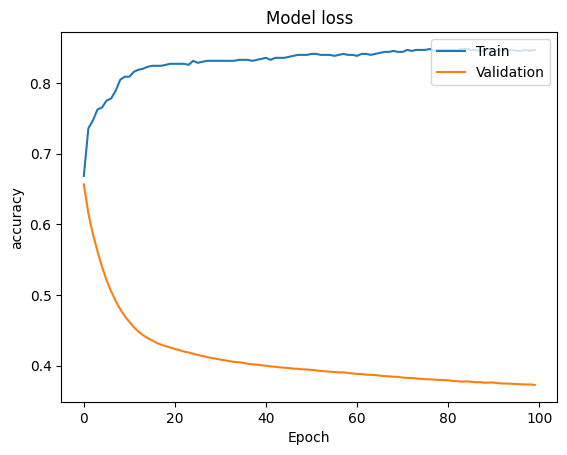

In [80]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [92]:
!pip install seaborn

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, classification_report

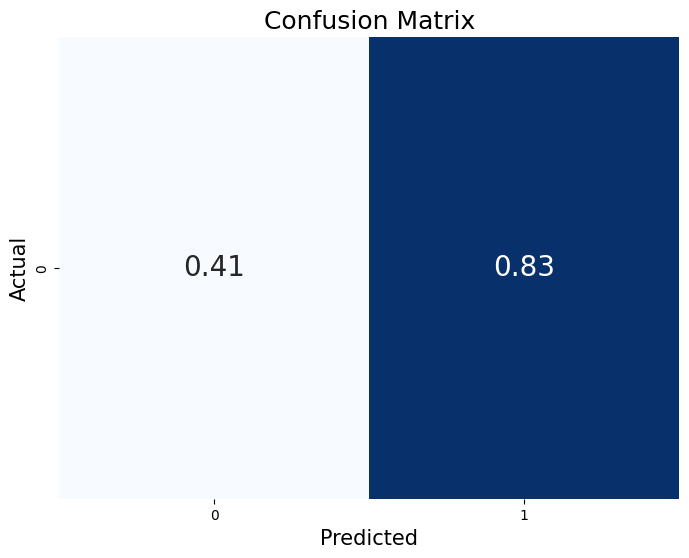

In [108]:
# Generate Confusion Matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt='.2f', cmap='Blues', cbar=False, annot_kws={'size': 20})
plt.xlabel('Predicted', size=15)
plt.ylabel('Actual', size=15)
plt.title('Confusion Matrix', size=18)
plt.show()

# Now we are checking our model on dedicated test data.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s our job to predict these outcomes.

In [82]:
# Save the trained model
model.save('titanic_model.h5')

In [83]:
test_ds.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'isAlone', 'isFamily', 'FamilySize', 'Title',
       'AgeGroup', 'FarePerPerson'],
      dtype='object')

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model


# List all feature column names used for model training, excluding 'Survived'
features = [
    'PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'isAlone', 'isFamily', 'FamilySize', 'Title',
       'AgeGroup', 'FarePerPerson'
]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(test_ds[features])

# Load the trained model
model = load_model('titanic_model.h5')  # Make sure to use the correct path to your saved model

# Generate predictions for the test set
predictions = (model.predict(features_scaled) > 0.5).astype(int).flatten()

# Create a DataFrame with PassengerId and the predictions (Survived)
results_df = pd.DataFrame({
    'PassengerId': test_ds['PassengerId'],
    'Survived': predictions
})

# Display the first few rows of the results to verify
print(results_df.head())
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy:.4f}')


14/14 [==============================] - 0s 3ms/step
   PassengerId  Survived
0    -1.727912         0
1    -1.719625         0
2    -1.711337         0
3    -1.703050         0
4    -1.694763         0
6/6 [==============================] - 0s 5ms/step - loss: 0.4106 - accuracy: 0.8324
Test Accuracy: 0.8324


In [86]:
# Save the DataFrame to a CSV file for submission
results_file_path = 'titanic_predictions.csv'
results_df.to_csv(results_file_path, index=False)

# I Check the Accuracy of titanic_predictions.csv file by uploading on Kaggle & I am getting around 75% Accuracy.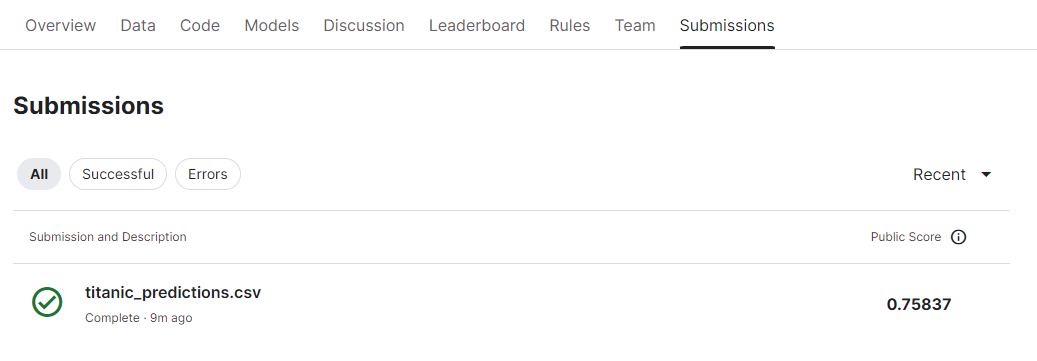

